<a href="https://colab.research.google.com/github/rvp3011/Lab0/blob/main/Practice_Activity_kNN_and_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [11]:
!pip install palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins

df = load_penguins()


y = df['bill_depth_mm']
X = df.drop(columns=['bill_depth_mm'])

X = pd.get_dummies(X, drop_first=True)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

df_combined = X.copy()
df_combined['target'] = y

df_combined_cleaned = df_combined.dropna()

X = df_combined_cleaned.drop(columns=['target'])
y = df_combined_cleaned['target']

print("Shape of X after dropping NaNs:", X.shape)
print("Shape of y after dropping NaNs:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X after dropping NaNs: (342, 9)
Shape of y after dropping NaNs: (342,)
Shape of X_train: (273, 9)
Shape of X_test: (69, 9)
Shape of y_train: (273,)
Shape of y_test: (69,)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

mlr_model = LinearRegression()

mlr_model.fit(X_train, y_train)

y_train_pred_mlr = mlr_model.predict(X_train)

y_test_pred_mlr = mlr_model.predict(X_test)

mlr_train_error = mean_squared_error(y_train, y_train_pred_mlr)

mlr_test_error = mean_squared_error(y_test, y_test_pred_mlr)

print("Multiple Linear Regression Training MSE:", round(mlr_train_error, 2))
print("Multiple Linear Regression Test MSE:", round(mlr_test_error, 2))

Multiple Linear Regression Training MSE: 0.62
Multiple Linear Regression Test MSE: 0.56


In [8]:
from sklearn.neighbors import KNeighborsRegressor

knn_model_3 = KNeighborsRegressor(n_neighbors=3)
knn_model_3.fit(X_train, y_train)
y_train_pred_knn3 = knn_model_3.predict(X_train)
y_test_pred_knn3 = knn_model_3.predict(X_test)
knn_3_train_error = mean_squared_error(y_train, y_train_pred_knn3)
knn_3_test_error = mean_squared_error(y_test, y_test_pred_knn3)

knn_model_7 = KNeighborsRegressor(n_neighbors=7)
knn_model_7.fit(X_train, y_train)
y_train_pred_knn7 = knn_model_7.predict(X_train)
y_test_pred_knn7 = knn_model_7.predict(X_test)
knn_7_train_error = mean_squared_error(y_train, y_train_pred_knn7)
knn_7_test_error = mean_squared_error(y_test, y_test_pred_knn7)

print("kNN (K=3) Training MSE:", round(knn_3_train_error, 2))
print("kNN (K=3) Test MSE:", round(knn_3_test_error, 2))
print("kNN (K=7) Training MSE:", round(knn_7_train_error, 2))
print("kNN (K=7) Test MSE:", round(knn_7_test_error, 2))

kNN (K=3) Training MSE: 1.17
kNN (K=3) Test MSE: 3.07
kNN (K=7) Training MSE: 1.7
kNN (K=7) Test MSE: 2.35


In [13]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

y_train_pred_dt = dt_model.predict(X_train)

y_test_pred_dt = dt_model.predict(X_test)

dt_train_error = mean_squared_error(y_train, y_train_pred_dt)

dt_test_error = mean_squared_error(y_test, y_test_pred_dt)

print("Decision Tree Training MSE:", round(dt_train_error, 2))
print("Decision Tree Test MSE:", round(dt_test_error, 2))

Decision Tree Training MSE: 0.0
Decision Tree Test MSE: 1.07


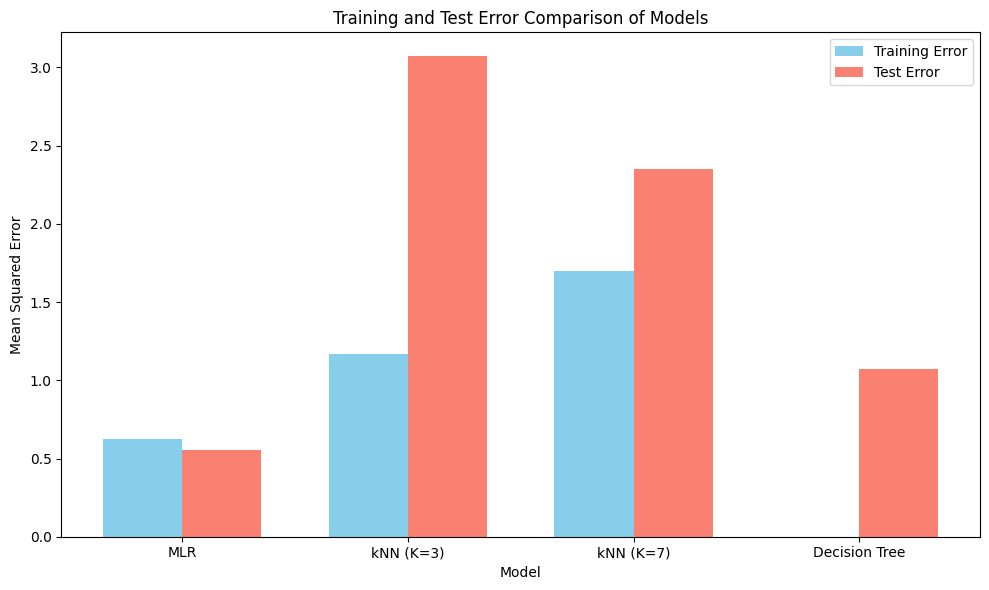

In [10]:
import matplotlib.pyplot as plt
import numpy as np

models = ['MLR', 'kNN (K=3)', 'kNN (K=7)', 'Decision Tree']
train_errors = [mlr_train_error, knn_3_train_error, knn_7_train_error, dt_train_error]
test_errors = [mlr_test_error, knn_3_test_error, knn_7_test_error, dt_test_error]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_errors, width, label='Training Error', color='skyblue')
rects2 = ax.bar(x + width/2, test_errors, width, label='Test Error', color='salmon')

ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Model')
ax.set_title('Training and Test Error Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()